# <b>Training Model on the Imputed Data</b>

<font size="3"> 
This notebook focuses on training machine learning models on imputed data obtained from the previous notebook. The main steps include oversampling using SMOTE and ADASYN, implementing various classification algorithms, identifying the best performing models, and then utilizing bagging, boosting, and stacking techniques to improve model performance.
</font>

## <b> Steps Covered:</b>
<ol>
<li>Data Preprocessing:
    <ul><li>Imputed missing values from the dataset.
    </ul>
<li>Oversampling:

<ul><li>Utilized SMOTE (Synthetic Minority Over-sampling Technique) and ADASYN (Adaptive Synthetic Sampling) to handle class imbalance.</ul>
<li>Classification Learning:
<ul>
<li>Implemented the following classification algorithms:
        <li>Logistic Regression
        <ul><li>    Support Vector Machine (SVM)
        <li>    k-Nearest Neighbors (KNN)
        <li>    Decision Tree
        <li>    Random Forest   
        </ul>
        </ul>

<li>Model Evaluation:
<ul><li>Identified the two best performing models based on evaluation metrics. (Random Forest: Rank 1, Decision Tree: Rank 2)
</ul>
<li>Bagging and Boosting:

<ul><li>Applied bagging and boosting techniques on Random Forest and Decision Tree classifiers.
Evaluated the accuracy and precision of the bagged and boosted models.</ul>
<li>Stacking:

<ul><li>Performed model stacking using the four selected models.
<li>Created a final model by combining the predictions from the stacked models.

<b> Dependencies:</b>
<ul>
<li>Python 3.x
<li>Jupyter Notebook
<li>Libraries: scikit-learn, pandas, numpy, etc.
</ul>
<b> Instructions: </b>
<ol>
<li>Ensure all necessary libraries are installed.
<li>Open and run the notebook Training_Model_on_Imputed_Data.ipynb using Jupyter Notebook.
<li>Follow along with each step in the notebook.
<li>Refer to the documentation for detailed explanations and insights.

<b> Importing the Libraries

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier


<b>Importing the datasets of the imputed encoded data.

In [2]:
data = pd.read_csv('imputed_encoded_data.csv')
data.head()

,Y,X8,X14,X15,X16,X17,X18,X19,X20,X21,...,X6,X7,X9,X10,X11,X12,X13,X90,X99,X110
0,0.0,21800.0,4.697935,6.112189,8.198628,11.820297,1.2,1105.0,89.0,22.0,...,261.0,4334.0,149.0,5749.0,9195.0,0.041259,0.033963,0.000507,0.004985,0.017442
1,0.0,21620.0,4.673502,6.029752,8.132146,11.792031,1.2,1160.0,88.0,23.0,...,255.0,4341.0,209.0,5738.0,9196.0,0.038728,0.035051,0.000351,0.004985,0.015536
2,0.0,21910.0,4.566613,5.816809,7.979106,11.747175,1.4,1135.0,73.0,23.0,...,186.0,4325.0,208.0,5744.0,9221.0,0.031911,0.034776,0.000273,0.008664,0.014487
3,0.0,21560.0,4.652251,5.958843,8.097748,11.801473,1.6,1115.0,66.0,22.0,...,243.0,4335.0,149.0,5745.0,9222.0,0.043007,0.036571,0.000234,0.003264,0.013391
4,0.0,21510.0,4.596386,5.947676,8.125361,11.797278,1.6,1115.0,65.0,22.0,...,244.0,4330.0,149.0,5739.0,9223.0,0.040466,0.035445,0.000195,0.003264,0.016203


In [3]:
data['Y'].value_counts()

0.0    25384
1.0      334
Name: Y, dtype: int64

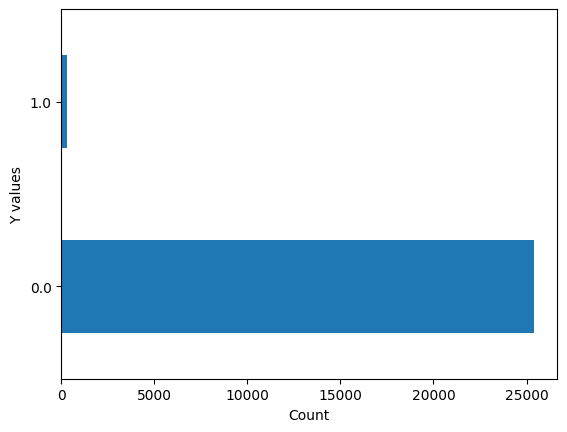

In [4]:
data['Y'].value_counts().plot(kind='barh')
plt.xlabel("Count")
plt.ylabel('Y values')
plt.show()

In [5]:
data.shape

(25718, 111)

In [6]:
data.describe()

,Y,X8,X14,X15,X16,X17,X18,X19,X20,X21,...,X6,X7,X9,X10,X11,X12,X13,X90,X99,X110
count,25718.000000,25718.000000,25718.000000,25718.000000,25718.000000,25718.000000,25718.000000,25718.000000,25718.000000,25718.000000,...,25718.000000,25718.000000,25718.000000,25718.000000,25718.000000,25718.000000,25718.000000,25718.000000,25718.000000,25718.000000
mean,0.012987,24196.011045,4.354294,6.436923,8.519015,11.586097,1.000726,1277.489898,100.209051,19.593953,...,8366.726417,1999.003655,165.477953,8433.622638,12858.500000,0.033654,0.025192,0.000456,0.007122,0.009943
std,0.113220,4109.912567,1.713143,1.630268,1.790918,1.571088,0.399122,121.776233,27.697053,101.204946,...,4775.869109,1199.774700,27.222641,4840.895117,7424.291448,0.030414,0.020976,0.000457,0.009129,0.004988
min,0.000000,7932.000000,-19.629785,-20.874003,0.000000,0.000000,0.420000,1000.000000,24.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000039,-0.010660,-0.000034,-0.016853,-0.002453
25%,0.000000,23080.000000,3.650000,5.840000,7.850000,10.950000,0.700000,1220.000000,81.000000,10.000000,...,4230.250000,964.250000,147.000000,4139.250000,6429.250000,0.009386,0.008800,0.000195,0.001958,0.006243
50%,0.000000,23931.638720,4.560000,6.507669,8.400000,11.396991,0.850000,1250.000000,97.000000,14.000000,...,8383.000000,1928.000000,175.000000,8480.000000,12858.500000,0.027416,0.019594,0.000312,0.004688,0.009999
75%,0.000000,25316.627351,5.110000,7.300000,9.130000,11.860000,1.200000,1365.000000,120.000000,23.000000,...,12528.000000,3008.750000,184.000000,12743.750000,19287.750000,0.045289,0.035082,0.000546,0.008664,0.014583
max,1.000000,79319.621124,40.020000,16.753146,37.400050,30.303060,2.038000,1535.000000,150.000000,9860.000000,...,16499.000000,4343.000000,212.000000,16612.000000,25717.000000,0.105127,0.070828,0.003741,0.047653,0.018776


<b> Oversampling 

In [7]:
#Applying Oversampling on the data 
from imblearn.over_sampling import SMOTE, ADASYN

# Assuming 'imputed_encoded_data' is your imputed encoded DataFrame

# Extract features (X) and target variable (y)
X = data.drop(columns=['Y'])  
y = data['Y']  

# Apply SMOTE
smote = SMOTE(random_state=0)
X_smote, y_smote = smote.fit_resample(X, y)

# Apply ADASYN
adasyn = ADASYN(random_state=0)
X_adasyn, y_adasyn = adasyn.fit_resample(X, y)

# Display the shape of the resampled data
print("Shape of SMOTE-resampled data:", X_smote.shape, y_smote.shape)
print("Shape of ADASYN-resampled data:", X_adasyn.shape, y_adasyn.shape)

Shape of SMOTE-resampled data: (50768, 110) (50768,)
Shape of ADASYN-resampled data: (50777, 110) (50777,)


<b>Model Training: 

In [8]:
# Split the data into train and test sets
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_adasyn, y_adasyn, test_size=0.2, random_state=42)

Logistics Regression

In [9]:

# Logistics Regression
def evaluate_logistic_regression(X_train, X_test, y_train, y_test):
    # Create a pipeline with scaling and logistic regression
    model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on test data
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store metrics in variables
    logistic_accuracy = accuracy
    logistic_precision = precision
    logistic_recall = recall
    logistic_f1 = f1

    # Print evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    # Return model and metrics
    return model, logistic_accuracy, logistic_precision, logistic_recall, logistic_f1

In [10]:

# Evaluate logistic regression model for SMOTE data
print("Evaluation metrics for SMOTE data:")
logistic_model_s, logistic_accuracy_s, logistic_precision_s, logistic_recall_s, logistic_f1_s = evaluate_logistic_regression(X_train_s, X_test_s, y_train_s, y_test_s)

# Evaluate logistic regression model for ADASYN data
print("\nEvaluation metrics for ADASYN data:")
logistic_model_a, logistic_accuracy_a, logistic_precision_a, logistic_recall_a, logistic_f1_a = evaluate_logistic_regression(X_train_a, X_test_a, y_train_a, y_test_a)


Evaluation metrics for SMOTE data:
Accuracy: 0.8087453220405751
Precision: 0.7895994119808893
Recall: 0.8435414212799371
F1 Score: 0.815679574791192

Evaluation metrics for ADASYN data:
Accuracy: 0.8074044899566759
Precision: 0.7898617511520737
Recall: 0.8400313663987453
F1 Score: 0.814174425232757


SVM

In [11]:

# SVM
def evaluate_SVM(X_train, X_test, y_train, y_test):
    # Create a pipeline with scaling and SVM
    model = make_pipeline(StandardScaler(), SVC())

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on test data
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store metrics in variables
    svm_accuracy = accuracy
    svm_precision = precision
    svm_recall = recall
    svm_f1 = f1

    # Print evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    # Return model and metrics
    return model, svm_accuracy, svm_precision, svm_recall, svm_f1


In [12]:

# Evaluate SVM model for SMOTE data
print("Evaluation metrics for SMOTE data:")
svm_model_s, svm_accuracy_s, svm_precision_s, svm_recall_s, svm_f1_s = evaluate_SVM(X_train_s, X_test_s, y_train_s, y_test_s)

# Evaluate SVM model for ADASYN data
print("\nEvaluation metrics for ADASYN data:")
svm_model_a, svm_accuracy_a, svm_precision_a, svm_recall_a, svm_f1_a = evaluate_SVM(X_train_a, X_test_a, y_train_a, y_test_a)


Evaluation metrics for SMOTE data:
Accuracy: 0.9806972621626945
Precision: 0.964177407126611
Recall: 0.9986258343148803
F1 Score: 0.981099324975892

Evaluation metrics for ADASYN data:
Accuracy: 0.9808979913351713
Precision: 0.9637119637119637
Recall: 0.9996079200156832
F1 Score: 0.9813317936874518


KNN

In [13]:
# KNN

# Modify the evaluate_KNN function to include scaling
def evaluate_KNN(X_train, X_test, y_train, y_test):
    # Create a pipeline with scaling and KNN
    model = make_pipeline(StandardScaler(), KNeighborsClassifier())

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on test data
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store metrics in variables
    knn_accuracy = accuracy
    knn_precision = precision
    knn_recall = recall
    knn_f1 = f1

    # Print evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    # Return model and metrics
    return model, knn_accuracy, knn_precision, knn_recall, knn_f1

# Evaluate KNN model for SMOTE data
print("Evaluation metrics for SMOTE data:")
knn_model_s, knn_accuracy_s, knn_precision_s, knn_recall_s, knn_f1_s = evaluate_KNN(X_train_s, X_test_s, y_train_s, y_test_s)

# Evaluate KNN model for ADASYN data
print("\nEvaluation metrics for ADASYN data:")
knn_model_a, knn_accuracy_a, knn_precision_a, knn_recall_a, knn_f1_a = evaluate_KNN(X_train_a, X_test_a, y_train_a, y_test_a)


Evaluation metrics for SMOTE data:
Accuracy: 0.9769548946228087
Precision: 0.956081081081081
Recall: 1.0
F1 Score: 0.9775474956822107

Evaluation metrics for ADASYN data:
Accuracy: 0.9763686490744388
Precision: 0.9550645946451976
Recall: 1.0
F1 Score: 0.9770158973376747


In [14]:

# Evaluate KNN model for SMOTE data
print("Evaluation metrics for SMOTE data:")
knn_model_s, knn_accuracy_s, knn_precision_s, knn_recall_s, knn_f1_s = evaluate_KNN(X_train_s, X_test_s, y_train_s, y_test_s)

# Evaluate KNN model for ADASYN data
print("\nEvaluation metrics for ADASYN data:")
knn_model_a, knn_accuracy_a, knn_precision_a, knn_recall_a, knn_f1_a = evaluate_KNN(X_train_a, X_test_a, y_train_a, y_test_a)


Evaluation metrics for SMOTE data:
Accuracy: 0.9769548946228087
Precision: 0.956081081081081
Recall: 1.0
F1 Score: 0.9775474956822107

Evaluation metrics for ADASYN data:
Accuracy: 0.9763686490744388
Precision: 0.9550645946451976
Recall: 1.0
F1 Score: 0.9770158973376747


Decision Tree classifier

In [15]:

# Function to train and evaluate Decision Tree classifier
def evaluate_decision_tree(X_train, X_test, y_train, y_test):
    # Initialize Decision Tree classifier
    model = DecisionTreeClassifier(random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on test data
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store metrics in variables
    dt_accuracy = accuracy
    dt_precision = precision
    dt_recall = recall
    dt_f1 = f1

    # Print evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    # Return model and metrics
    return model, dt_accuracy, dt_precision, dt_recall, dt_f1


In [16]:
# Evaluate Decision Tree model for SMOTE data
print("Evaluation metrics for SMOTE data:")
dt_model_s, dt_accuracy_s, dt_precision_s, dt_recall_s, dt_f1_s = evaluate_decision_tree(X_train_s, X_test_s, y_train_s, y_test_s)

# Evaluate Decision Tree model for ADASYN data
print("\nEvaluation metrics for ADASYN data:")
dt_model_a, dt_accuracy_a, dt_precision_a, dt_recall_a, dt_f1_a = evaluate_decision_tree(X_train_a, X_test_a, y_train_a, y_test_a)


Evaluation metrics for SMOTE data:
Accuracy: 0.982272995863699
Precision: 0.9776438569206843
Recall: 0.9872398900667452
F1 Score: 0.9824184411017776

Evaluation metrics for ADASYN data:
Accuracy: 0.98168570303269
Precision: 0.9728689628631904
Recall: 0.991178200352872
F1 Score: 0.9819382404350359


Random Forest classifier

In [17]:

# Function to train and evaluate Random Forest classifier
def evaluate_random_forest(X_train, X_test, y_train, y_test):
    # Initialize Random Forest classifier
    model = RandomForestClassifier(n_estimators=100, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on test data
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store metrics in variables
    rf_accuracy = accuracy
    rf_precision = precision
    rf_recall = recall
    rf_f1 = f1

    # Print evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    # Return model and metrics
    return model, rf_accuracy, rf_precision, rf_recall, rf_f1



In [18]:
# Evaluate Random Forest model for SMOTE data
print("Evaluation metrics for SMOTE data:")
rf_model_s, rf_accuracy_s, rf_precision_s, rf_recall_s, rf_f1_s = evaluate_random_forest(X_train_s, X_test_s, y_train_s, y_test_s)

# Evaluate Random Forest model for ADASYN data
print("\nEvaluation metrics for ADASYN data:")
rf_model_a, rf_accuracy_a, rf_precision_a, rf_recall_a, rf_f1_a = evaluate_random_forest(X_train_a, X_test_a, y_train_a, y_test_a)


Evaluation metrics for SMOTE data:
Accuracy: 0.9984242662989955
Precision: 0.9988212180746562
Recall: 0.9980369061641147
F1 Score: 0.9984289080911234

Evaluation metrics for ADASYN data:
Accuracy: 0.9979322567940134
Precision: 0.9986258343148803
Recall: 0.9972554401097824
F1 Score: 0.997940166748406


<b>Comparing the various models 

In [19]:
# Create lists to store model accuracies
smote_accuracies = [logistic_accuracy_s, svm_accuracy_s, knn_accuracy_s, dt_accuracy_s, rf_accuracy_s]
adasyn_accuracies = [logistic_accuracy_a, svm_accuracy_a, knn_accuracy_a, dt_accuracy_a, rf_accuracy_a]
model_names = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest']

# Sort model accuracies and get the ranks
smote_ranked_models = [model_names[i] for i in sorted(range(len(smote_accuracies)), key=lambda k: smote_accuracies[k], reverse=True)]
adasyn_ranked_models = [model_names[i] for i in sorted(range(len(adasyn_accuracies)), key=lambda k: adasyn_accuracies[k], reverse=True)]

# Print ranks
print("Ranks for SMOTE dataset:")
for i, model in enumerate(smote_ranked_models):
    print(f"{model}: Rank {i+1}")

print("\nRanks for ADASYN dataset:")
for i, model in enumerate(adasyn_ranked_models):
    print(f"{model}: Rank {i+1}")


Ranks for SMOTE dataset:
Random Forest: Rank 1
Decision Tree: Rank 2
SVM: Rank 3
KNN: Rank 4
Logistic Regression: Rank 5

Ranks for ADASYN dataset:
Random Forest: Rank 1
Decision Tree: Rank 2
SVM: Rank 3
KNN: Rank 4
Logistic Regression: Rank 5


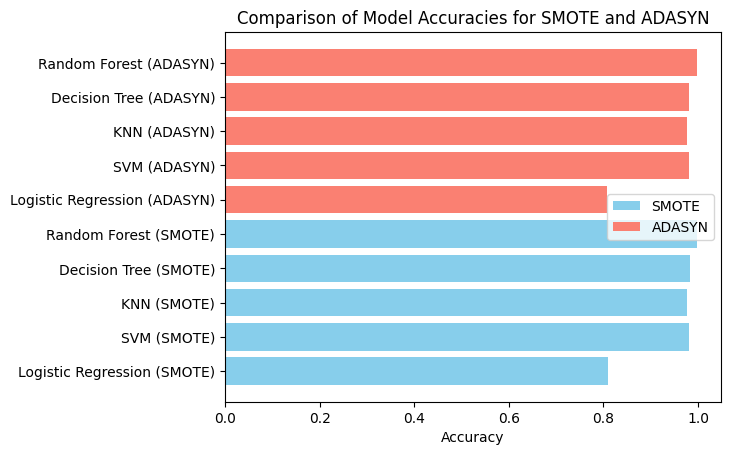

In [34]:
# Create figure and axis objects
fig, ax = plt.subplots()
# Plot SMOTE accuracies
ax.barh([model + " (SMOTE)" for model in model_names], smote_accuracies, color='skyblue', label='SMOTE')
# Plot ADASYN accuracies
ax.barh([model + " (ADASYN)" for model in model_names], adasyn_accuracies, color='salmon', label='ADASYN')

# Set labels and title
ax.set_xlabel('Accuracy')
ax.set_title('Comparison of Model Accuracies for SMOTE and ADASYN')
# Add legend
ax.legend()
# Show plot
plt.show()


<i><b> Two of the best performing models: </b></i>
<ol>
<li>Random Forest: Rank 1
<li>Decision Tree: Rank 2
</ol>


In [21]:
# Create lists to store model precisions
smote_precisions = [logistic_precision_s, svm_precision_s, knn_precision_s, dt_precision_s, rf_precision_s]
adasyn_precisions = [logistic_precision_a, svm_precision_a, knn_precision_a, dt_precision_a, rf_precision_a]
model_names = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest']

# Sort model precisions and get the ranks
smote_ranked_models = [model_names[i] for i in sorted(range(len(smote_precisions)), key=lambda k: smote_precisions[k], reverse=True)]
adasyn_ranked_models = [model_names[i] for i in sorted(range(len(adasyn_precisions)), key=lambda k: adasyn_precisions[k], reverse=True)]

# Print ranks
print("Ranks for SMOTE dataset (based on precision):")
for i, model in enumerate(smote_ranked_models):
    print(f"{model}: Rank {i+1}")

print("\nRanks for ADASYN dataset (based on precision):")
for i, model in enumerate(adasyn_ranked_models):
    print(f"{model}: Rank {i+1}")


Ranks for SMOTE dataset (based on precision):
Random Forest: Rank 1
Decision Tree: Rank 2
SVM: Rank 3
KNN: Rank 4
Logistic Regression: Rank 5

Ranks for ADASYN dataset (based on precision):
Random Forest: Rank 1
Decision Tree: Rank 2
SVM: Rank 3
KNN: Rank 4
Logistic Regression: Rank 5


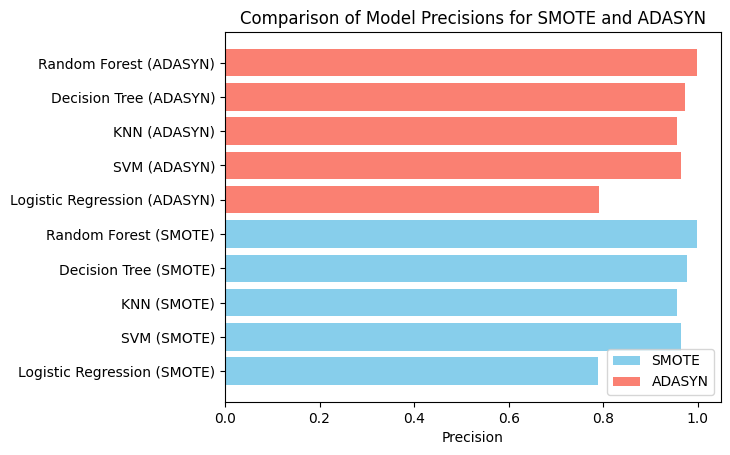

In [22]:
# Create lists to store model precisions
smote_precisions = [logistic_precision_s, svm_precision_s, knn_precision_s, dt_precision_s, rf_precision_s]
adasyn_precisions = [logistic_precision_a, svm_precision_a, knn_precision_a, dt_precision_a, rf_precision_a]
model_names = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest']

# Create figure and axis objects
fig, ax = plt.subplots()

# Plot SMOTE precisions
ax.barh([model + " (SMOTE)" for model in model_names], smote_precisions, color='skyblue', label='SMOTE')

# Plot ADASYN precisions
ax.barh([model + " (ADASYN)" for model in model_names], adasyn_precisions, color='salmon', label='ADASYN')

# Set labels and title
ax.set_xlabel('Precision')
ax.set_title('Comparison of Model Precisions for SMOTE and ADASYN')

# Add legend
ax.legend()

# Show plot
plt.show()

### <b><i>  Performing ensemble learning </i></b>


To perform ensemble learning using bagging and boosting techniques on Decision Tree and Random Forest Classification, we can use Scikit-learn's BaggingClassifier and AdaBoostClassifier respectively.

In [23]:

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Define base classifiers
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()


In [24]:
# Ensemble using Bagging with Decision Tree 
bagging_dt = BaggingClassifier(base_estimator=dt, n_estimators=10, random_state=0)
bagging_dt.fit(X_train, y_train)  # Fit on the training set
y_pred_bagging_dt = bagging_dt.predict(X_test)  # Predict on the test set
precision_bagging_dt = precision_score(y_test, y_pred_bagging_dt)
recall_bagging_dt = recall_score(y_test, y_pred_bagging_dt)
f1_bagging_dt = f1_score(y_test, y_pred_bagging_dt)
accuracy_bagging_dt = accuracy_score(y_test, y_pred_bagging_dt)

In [25]:
# Ensemble using Bagging with Random Forest
bagging_rf = BaggingClassifier(base_estimator=rf, n_estimators=10, random_state=0)
bagging_rf.fit(X_train, y_train)
y_pred_bagging_rf = bagging_rf.predict(X_test)
precision_bagging_rf = precision_score(y_test, y_pred_bagging_rf)
recall_bagging_rf = recall_score(y_test, y_pred_bagging_rf)
f1_bagging_rf = f1_score(y_test, y_pred_bagging_rf)
accuracy_bagging_rf = accuracy_score(y_test, y_pred_bagging_rf)

In [26]:
# Ensemble using Boosting with Decision Tree
boosting_dt = AdaBoostClassifier(base_estimator=dt, n_estimators=50, random_state=0)
boosting_dt.fit(X_train, y_train)
y_pred_boosting_dt = boosting_dt.predict(X_test)
precision_boosting_dt = precision_score(y_test, y_pred_boosting_dt)
recall_boosting_dt = recall_score(y_test, y_pred_boosting_dt)
f1_boosting_dt = f1_score(y_test, y_pred_boosting_dt)
accuracy_boosting_dt = accuracy_score(y_test, y_pred_boosting_dt)

In [27]:

# Ensemble using Boosting with Random Forest
boosting_rf = AdaBoostClassifier(base_estimator=rf, n_estimators=50, random_state=0)
boosting_rf.fit(X_train, y_train)
y_pred_boosting_rf = boosting_rf.predict(X_test)
precision_boosting_rf = precision_score(y_test, y_pred_boosting_rf)
recall_boosting_rf = recall_score(y_test, y_pred_boosting_rf)
f1_boosting_rf = f1_score(y_test, y_pred_boosting_rf)
accuracy_boosting_rf = accuracy_score(y_test, y_pred_boosting_rf)

In [28]:

# Display results
print("Bagging with Decision Tree:")
print("Precision:", precision_bagging_dt)
print("Recall:", recall_bagging_dt)
print("F1 Score:", f1_bagging_dt)
print("Accuracy:", accuracy_bagging_dt)

print("\nBagging with Random Forest:")
print("Precision:", precision_bagging_rf)
print("Recall:", recall_bagging_rf)
print("F1 Score:", f1_bagging_rf)
print("Accuracy:", accuracy_bagging_rf)

print("\nBoosting with Decision Tree:")
print("Precision:", precision_boosting_dt)
print("Recall:", recall_boosting_dt)
print("F1 Score:", f1_boosting_dt)
print("Accuracy:", accuracy_boosting_dt)

print("\nBoosting with Random Forest:")
print("Precision:", precision_boosting_rf)
print("Recall:", recall_boosting_rf)
print("F1 Score:", f1_boosting_rf)
print("Accuracy:", accuracy_boosting_rf)

Bagging with Decision Tree:
Precision: 0.99391321421559
Recall: 0.9937180997251669
F1 Score: 0.9938156473937372
Accuracy: 0.9937955485522947

Bagging with Random Forest:
Precision: 0.9984301412872841
Recall: 0.9988221436984688
F1 Score: 0.9986261040235526
Accuracy: 0.9986212330116211

Boosting with Decision Tree:
Precision: 0.9804878048780488
Recall: 0.9864546525323911
F1 Score: 0.9834621782953322
Accuracy: 0.9833563127831396

Boosting with Random Forest:
Precision: 0.9992141453831042
Recall: 0.9984295249312917
F1 Score: 0.9988216810683425
Accuracy: 0.9988181997242466


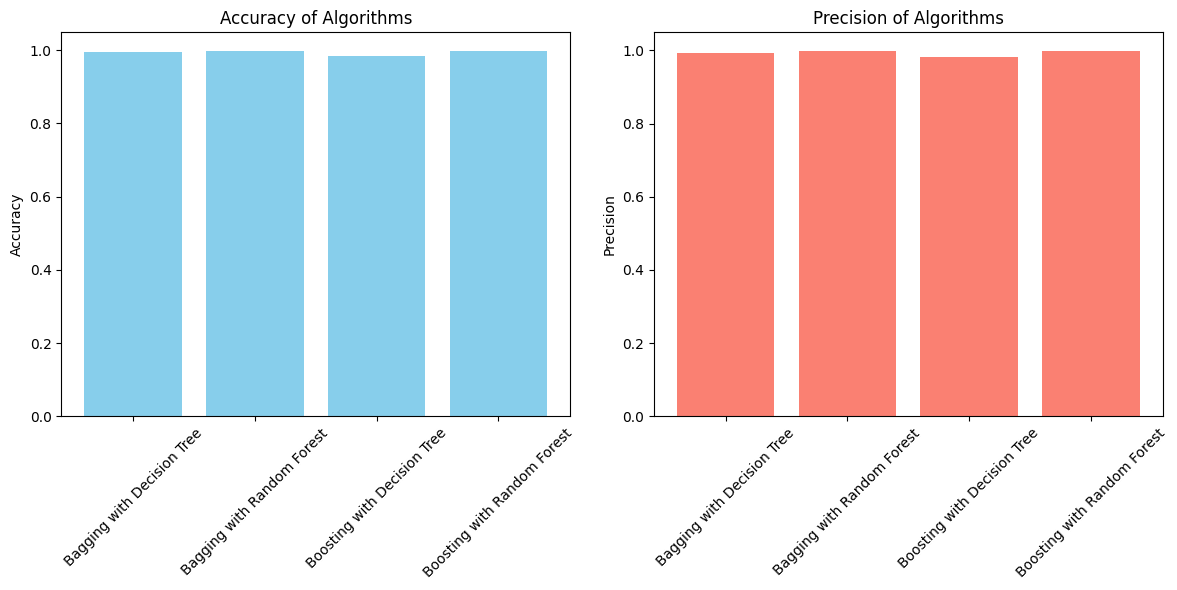

In [29]:
# Define the algorithms
algorithms = ['Bagging with Decision Tree', 'Bagging with Random Forest', 'Boosting with Decision Tree', 'Boosting with Random Forest']

# Accuracy values
accuracy_values = [accuracy_bagging_dt, accuracy_bagging_rf, accuracy_boosting_dt, accuracy_boosting_rf]

# Precision values
precision_values = [precision_bagging_dt, precision_bagging_rf, precision_boosting_dt, precision_boosting_rf]

# Create subplots for accuracy and precision
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot accuracy
axes[0].bar(algorithms, accuracy_values, color='skyblue')
axes[0].set_title('Accuracy of Algorithms')
axes[0].set_ylabel('Accuracy')

# Plot precision
axes[1].bar(algorithms, precision_values, color='salmon')
axes[1].set_title('Precision of Algorithms')
axes[1].set_ylabel('Precision')

# Rotate x-axis labels for better readability
for ax in axes:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [30]:
# Create lists to store accuracy and precision values for each model
models = ['Bagging with Decision Tree', 'Bagging with Random Forest', 'Boosting with Decision Tree', 'Boosting with Random Forest']
accuracies = [accuracy_bagging_dt, accuracy_bagging_rf, accuracy_boosting_dt, accuracy_boosting_rf]
precisions = [precision_bagging_dt, precision_bagging_rf, precision_boosting_dt, precision_boosting_rf]

# Sort models based on accuracy and precision
sorted_models_by_accuracy = [model for _, model in sorted(zip(accuracies, models), reverse=True)]
sorted_models_by_precision = [model for _, model in sorted(zip(precisions, models), reverse=True)]

# Print sorted models according to accuracy
print("Models sorted by accuracy:")
for i, model in enumerate(sorted_models_by_accuracy):
    print(f"{i+1}. {model} (Accuracy: {accuracies[models.index(model)]}, Precision: {precisions[models.index(model)]})")

# Print sorted models according to precision
print("\nModels sorted by precision:")
for i, model in enumerate(sorted_models_by_precision):
    print(f"{i+1}. {model} (Accuracy: {accuracies[models.index(model)]}, Precision: {precisions[models.index(model)]})")


Models sorted by accuracy:
1. Boosting with Random Forest (Accuracy: 0.9988181997242466, Precision: 0.9992141453831042)
2. Bagging with Random Forest (Accuracy: 0.9986212330116211, Precision: 0.9984301412872841)
3. Bagging with Decision Tree (Accuracy: 0.9937955485522947, Precision: 0.99391321421559)
4. Boosting with Decision Tree (Accuracy: 0.9833563127831396, Precision: 0.9804878048780488)

Models sorted by precision:
1. Boosting with Random Forest (Accuracy: 0.9988181997242466, Precision: 0.9992141453831042)
2. Bagging with Random Forest (Accuracy: 0.9986212330116211, Precision: 0.9984301412872841)
3. Bagging with Decision Tree (Accuracy: 0.9937955485522947, Precision: 0.99391321421559)
4. Boosting with Decision Tree (Accuracy: 0.9833563127831396, Precision: 0.9804878048780488)


<b> <i>Stacking with all four models: ['Bagging with Decision Tree', 'Bagging with Random Forest', 'Boosting with Decision Tree', 'Boosting with Random Forest']</b> </i>

In [31]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Initialize stacking classifier with all four models
stacking_classifier_all = StackingClassifier(estimators=[
    ('bagging_dt', bagging_dt),
    ('bagging_rf', bagging_rf),
    ('boosting_dt', boosting_dt),
    ('boosting_rf', boosting_rf)
], final_estimator=LogisticRegression())

# Fit stacking classifier on the training data
stacking_classifier_all.fit(X_train, y_train)

# Evaluate stacking classifier on test data
accuracy_stacking_all = stacking_classifier_all.score(X_test, y_test)
precision_stacking_all = precision_score(y_test, stacking_classifier_all.predict(X_test))

print("Stacking with all models:")
print("Accuracy:", accuracy_stacking_all)
print("Precision:", precision_stacking_all)


Stacking with all models:
Accuracy: 0.9984242662989955
Precision: 0.9994099134539732


<b><i>Stacking with the top two models based on accuracy:['Bagging with Random Forest', 'Boosting with Random Forest']

In [32]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Initialize stacking classifier with top two models based on accuracy
stacking_classifier_top2 = StackingClassifier(estimators=[
    ('bagging_rf', bagging_rf),
    ('boosting_rf', boosting_rf)
], final_estimator=LogisticRegression())

# Fit stacking classifier on the training data
stacking_classifier_top2.fit(X_train, y_train)

# Evaluate stacking classifier on test data
accuracy_stacking_top2 = stacking_classifier_top2.score(X_test, y_test)
precision_stacking_top2 = precision_score(y_test, stacking_classifier_top2.predict(X_test))

print("Stacking with top two models based on accuracy:")
print("Accuracy:", accuracy_stacking_top2)
print("Precision:", precision_stacking_top2)


Stacking with top two models based on accuracy:
Accuracy: 0.9984242662989955
Precision: 0.9990172955974843
